In [2]:
pip install opendatasets

In [3]:
import opendatasets as od  #ditipriyapa,b5dbae786e0aeaee254cedc52685a4e2


download_url='https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ditipriyapa
Your Kaggle Key: ··········


100%|██████████| 450k/450k [00:00<00:00, 23.9MB/s]

In [4]:
data_filename='./road-traffic-accidents/RTA Dataset.csv'

##Data Preparation and Cleaning
1. Load the file using Pandas
2.Look at some information about the data and the columns
3.Fix any missing or incorrect values


In [5]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv(data_filename)


In [7]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [8]:
df.shape

(12316, 32)

In [ ]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

There are 30 categorical datasets and 2 numerical datasets

Missing Values

In [9]:
df1=(df.isnull().sum()[df.isnull().sum()>0]).to_frame().rename(columns={0:"No. of missing values"})
df1

,No. of missing values
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928
Defect_of_vehicle,4427
Area_accident_occured,239
Lanes_or_Medians,385
Road_allignment,142


In [10]:
df1['No. of missing values']=df.isnull().sum()
df1

,No. of missing values
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928
Defect_of_vehicle,4427
Area_accident_occured,239
Lanes_or_Medians,385
Road_allignment,142


In [11]:
df1['% of missing values']=round((100*df.isnull().sum())/len(df),3)
df1

,No. of missing values,% of missing values
Educational_level,741,6.017
Vehicle_driver_relation,579,4.701
Driving_experience,829,6.731
Type_of_vehicle,950,7.714
Owner_of_vehicle,482,3.914
Service_year_of_vehicle,3928,31.893
Defect_of_vehicle,4427,35.945
Area_accident_occured,239,1.941
Lanes_or_Medians,385,3.126
Road_allignment,142,1.153


In [12]:
d=(df.duplicated().sum()),(100*df.duplicated().sum()/len(df))
print(f"Check duplicated values:{d}")

Check duplicated values:(0, 0.0)


Statistic Summary of Data


In [13]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [17]:
num_df=df.select_dtypes(include="int") #Only 2 columns
num_df

,Number_of_vehicles_involved,Number_of_casualties
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
12311,2,1
12312,2,1
12313,1,1
12314,2,1


In [14]:
cat_df=df.select_dtypes(include="O") #30 columns
cat_df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [15]:
for i in cat_df:
  print("Categorical Unique Values",df[i].unique())
  print("-"*100)

Categorical Unique Values ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
----------------------------------------------------------------------------------------------------
Categorical Unique Values ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
----------------------------------------------------------------------------------------------------
Categorical Unique Values ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
----------------------------------------------------------------------------------------------------
Categorical Unique Values ['Male' 'Female' 'Unknown']
----------------------------------------------------------------------------------------------------
Categorical Unique Values ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
----------------------------------------------------------------------------------------------------
Categorical Unique Va

Cleaning out Numerical Features

In [18]:
num_df.isnull().sum() # No Missing Values

Number_of_vehicles_involved    0
Number_of_casualties           0
dtype: int64

Checking for valid/useful numerical features and removing the rest

In [19]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [20]:
cat_df.shape


(12316, 30)

In [21]:
cat_df1=cat_df.drop(columns=['Educational_level','Vehicle_driver_relation','Owner_of_vehicle','Casualty_class','Sex_of_casualty'])

In [22]:
cat_df1.shape

(12316, 25)

In [23]:
cat_df1.isnull().sum()

Time                          0
Day_of_week                   0
Age_band_of_driver            0
Sex_of_driver                 0
Driving_experience          829
Type_of_vehicle             950
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Road_surface_conditions       0
Light_conditions              0
Weather_conditions            0
Type_of_collision           155
Vehicle_movement            308
Age_band_of_casualty          0
Casualty_severity             0
Work_of_casuality          3198
Fitness_of_casuality       2635
Pedestrian_movement           0
Cause_of_accident             0
Accident_severity             0
dtype: int64

**Age_band_of_driver**

In [24]:
cat_df1['Age_band_of_driver'].value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64

There are 1548 unknown values.We have to give them correct age criteria by comparing with different feature

In [25]:
cat_df1['Age_band_of_casualty'].value_counts()

na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: Age_band_of_casualty, dtype: int64

In [26]:
pd.crosstab(cat_df1['Age_band_of_driver'],cat_df1['Age_band_of_casualty'])

Age_band_of_casualty,18-30,31-50,5,Over 51,Under 18,na
Age_band_of_driver,,,,,,
18-30,1123,876,90,331,369,1482
31-50,1015,773,72,336,364,1527
Over 51,398,306,24,130,135,592
Under 18,220,163,25,68,56,293
Unknown,389,337,33,129,111,549


In [27]:
pd.crosstab(cat_df1['Age_band_of_driver'],cat_df1['Driving_experience'])

Driving_experience,1-2yr,2-5yr,5-10yr,Above 10yr,Below 1yr,No Licence,unknown
Age_band_of_driver,,,,,,,
18-30,583,908,1136,772,517,44,12
31-50,584,869,1138,769,416,40,9
Over 51,257,330,418,291,155,13,4
Under 18,102,187,247,134,96,6,3
Unknown,230,319,424,296,158,15,5


We got the feature where i can compare with **Driving_experience**on basis on experience i can assume age range.





Feature Sex_of_driver

In [28]:
cat_df['Sex_of_driver'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Male
1          Male
2          Male
3          Male
4          Male
          ...  
12311      Male
12312      Male
12313      Male
12314    Female
12315      Male
Name: Sex_of_driver, Length: 12316, dtype: object>

In [29]:
cat_df['Sex_of_driver'].isnull().sum()

0

Feature

In [30]:
cat_df['Driving_experience'].value_counts

<bound method IndexOpsMixin.value_counts of 0             1-2yr
1        Above 10yr
2             1-2yr
3            5-10yr
4             2-5yr
            ...    
12311         2-5yr
12312        5-10yr
12313        5-10yr
12314    Above 10yr
12315        5-10yr
Name: Driving_experience, Length: 12316, dtype: object>

In [ ]:
cat_df1['Driving_experience'].fillna(cat_df1['Driving_experience'].mode()[0],inplace=True)

In [ ]:
cat_df1['Driving_experience'].isnull().sum()

0

Feature Type_of_vehicle

In [ ]:
cat_df1['Type_of_vehicle'].value_counts()

Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

In [ ]:
cat_df['Type_of_vehicle'].isnull().sum()

950

In [ ]:
cat_df1['Type_of_vehicle'].fillna(cat_df1['Type_of_vehicle'].mode()[0],inplace=True)

Feature Road_allignment

In [49]:
cat_df1['Road_allignment'].value_counts()

Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: Road_allignment, dtype: int64

In [50]:
cat_df1['Road_allignment'].isnull().sum()

142

In [51]:
cat_df1['Road_allignment'].fillna(cat_df1['Road_allignment'].mode()[0],inplace=True)

In [52]:
cat_df1['Road_allignment'].isnull().sum()

0

Types of Junctions

In [56]:
cat_df1['Types_of_Junction'].value_counts()

Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: Types_of_Junction, dtype: int64

191 unknown values

*Light_condition*

In [ ]:
cat_df1['Light_conditions'].value_counts()

Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: Light_conditions, dtype: int64

Weather_conditions

In [ ]:
cat_df1['Weather_conditions'].value_counts()

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: Weather_conditions, dtype: int64

In [ ]:
cat_df1['Weather_conditions'].unique()

array(['Normal', 'Raining', 'Raining and Windy', 'Cloudy', 'Other',
       'Windy', 'Snow', 'Unknown', 'Fog or mist'], dtype=object)

Type_of_collision

In [ ]:
cat_df1['Type_of_collision'].value_counts()

Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: Type_of_collision, dtype: int64

In [ ]:
cat_df1['Type_of_collision'].isnull().sum()

155

In [ ]:
cat_df1['Type_of_collision'].fillna(cat_df1['Type_of_collision'].mode()[0],inplace=True)

In [ ]:
cat_df1['Type_of_collision'].isnull().sum()

0

Road_surface_type

In [ ]:
cat_df["Road_surface_type"].value_counts()

Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64

In [ ]:
cat_df1["Road_surface_type"].unique()

array(['Asphalt roads', 'Earth roads', nan,
       'Asphalt roads with some distress', 'Gravel roads', 'Other'],
      dtype=object)

In [ ]:
cat_df1["Road_surface_type"].fillna(cat_df["Road_surface_type"].mode()[0],inplace=True)

In [ ]:
cat_df1["Road_surface_type"].isnull().sum()

0

Road_surface_conditions

In [ ]:
cat_df1["Road_surface_conditions"].value_counts()

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64

In [ ]:
cat_df['Road_surface_conditions'].isnull().sum()


0

Light_conditions

In [ ]:
cat_df1['Light_conditions'].value_counts()

Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: Light_conditions, dtype: int64

Accident_severity

In [ ]:
cat_df1['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [ ]:
cat_df1['Accident_severity'].isnull().sum()

0

In [32]:
df2=pd.concat((cat_df,num_df),axis=1)

Exploratory Data Analysis

In [ ]:
df2.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Number_of_vehicles_involved,Number_of_casualties
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,2,2
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2,2
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,2,2
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,2,2
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,2,2


In [35]:
a=df2.groupby('Cause_of_accident')['Cause_of_accident'].agg(["count"])
b=a.sort_values(by='count',ascending=False).reset_index()
b

,Cause_of_accident,count
0,No distancing,2263
1,Changing lane to the right,1808
2,Changing lane to the left,1473
3,Driving carelessly,1402
4,No priority to vehicle,1207
5,Moving Backward,1137
6,No priority to pedestrian,721
7,Other,456
8,Overtaking,430
9,Driving under the influence of drugs,340


In [36]:
ab=b.loc[0:10,]
c=ab['Cause_of_accident']
d=ab['count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'No distancing'),
  Text(1, 0, 'Changing lane to the right'),
  Text(2, 0, 'Changing lane to the left'),
  Text(3, 0, 'Driving carelessly'),
  Text(4, 0, 'No priority to vehicle'),
  Text(5, 0, 'Moving Backward'),
  Text(6, 0, 'No priority to pedestrian'),
  Text(7, 0, 'Other'),
  Text(8, 0, 'Overtaking'),
  Text(9, 0, 'Driving under the influence of drugs'),
  Text(10, 0, 'Driving to the left')])

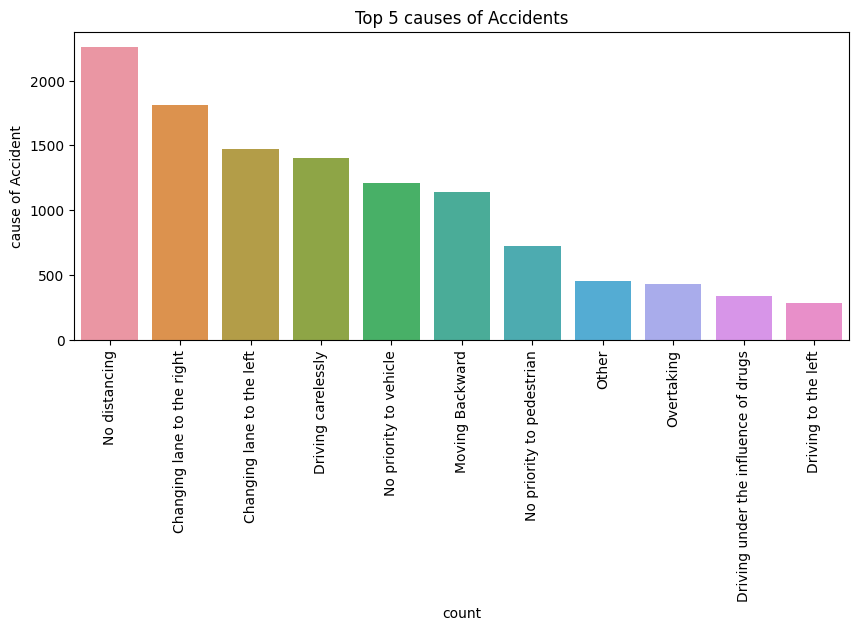

In [37]:
plt.figure(figsize=(10,4))
sns.barplot(data=ab,x='Cause_of_accident',y='count')
plt.title('Top 5 causes of Accidents')
plt.xlabel('count')
plt.ylabel('cause of Accident')
plt.xticks(rotation='vertical')

In [ ]:
# Observation:
#There are four major Road Accident causes which are [NO Distance , Changing lane to the right ,Changing lane to the
  #left, Driving carelessly ]
#Conditional Probability of Each Cause to Happen When Maximum (Fatal) Severity Occur .

In [40]:
A=df2.groupby(['Light_conditions'])['Accident_severity'].agg(['count'])
B=A.sort_values(by='count',ascending=False).reset_index()
B

,Light_conditions,count
0,Daylight,8798
1,Darkness - lights lit,3286
2,Darkness - no lighting,192
3,Darkness - lights unlit,40


Text(0.5, 1.0, 'Max Road Accident Severity')

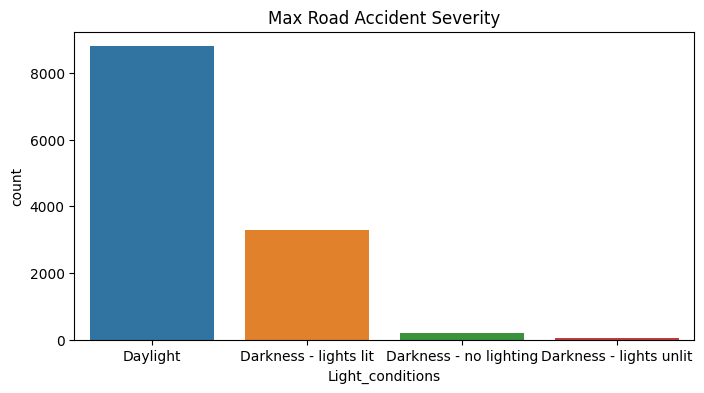

In [41]:
plt.figure(figsize=(8,4))
sns.barplot(data=B,x='Light_conditions',y='count')
plt.title('Max Road Accident Severity')

In [59]:
df2["Sex_of_driver"].replace({'Male':1,'Female':0})

0        1
1        1
2        1
3        1
4        1
        ..
12311    1
12312    1
12313    1
12314    0
12315    1
Name: Sex_of_driver, Length: 12316, dtype: object

In [64]:
p=df2.groupby(["Sex_of_driver"])['Accident_severity'].agg(['count'])
q=p.sort_values(by='count',ascending=False).reset_index()
q

,Sex_of_driver,count
0,Male,11437
1,Female,701
2,Unknown,178


<Axes: xlabel='Sex_of_driver', ylabel='count'>

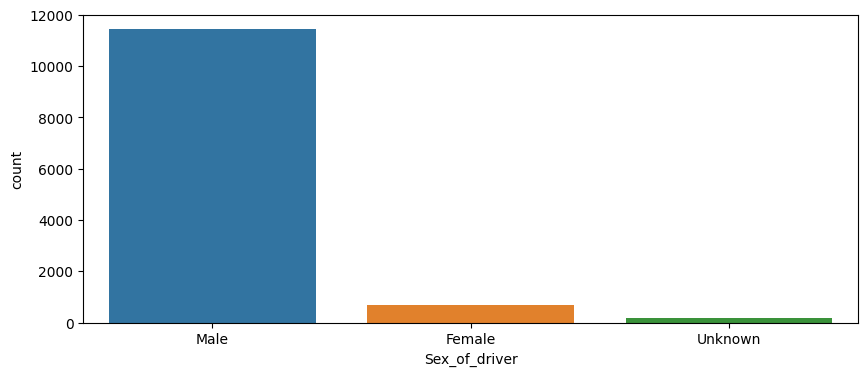

In [69]:
plt.figure(figsize=(10,4))
sns.barplot(data=q,x="Sex_of_driver",y='count')


Text(0.5, 1.0, '% Gender involve in Road Accident')

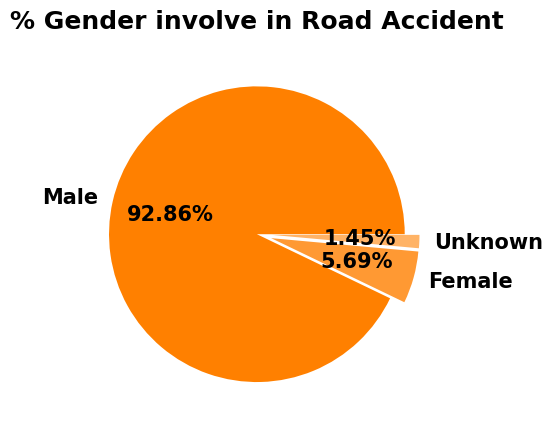

In [70]:
gender = df2["Sex_of_driver"].value_counts()
plt.pie(gender, labels=gender.index,autopct="%.2f%%",textprops={"fontweight":"black","size":15},
 explode=[0,0.1,0.1],colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'])
plt.title("% Gender involve in Road Accident",fontweight="black",pad=15,size=18)

In [72]:
p=df2.groupby(["Age_band_of_driver"])['Accident_severity'].agg(['count'])
q=p.sort_values(by='count',ascending=False).reset_index()
q

,Age_band_of_driver,count
0,18-30,4271
1,31-50,4087
2,Over 51,1585
3,Unknown,1548
4,Under 18,825


Text(0.5, 1.0, 'Age Group')

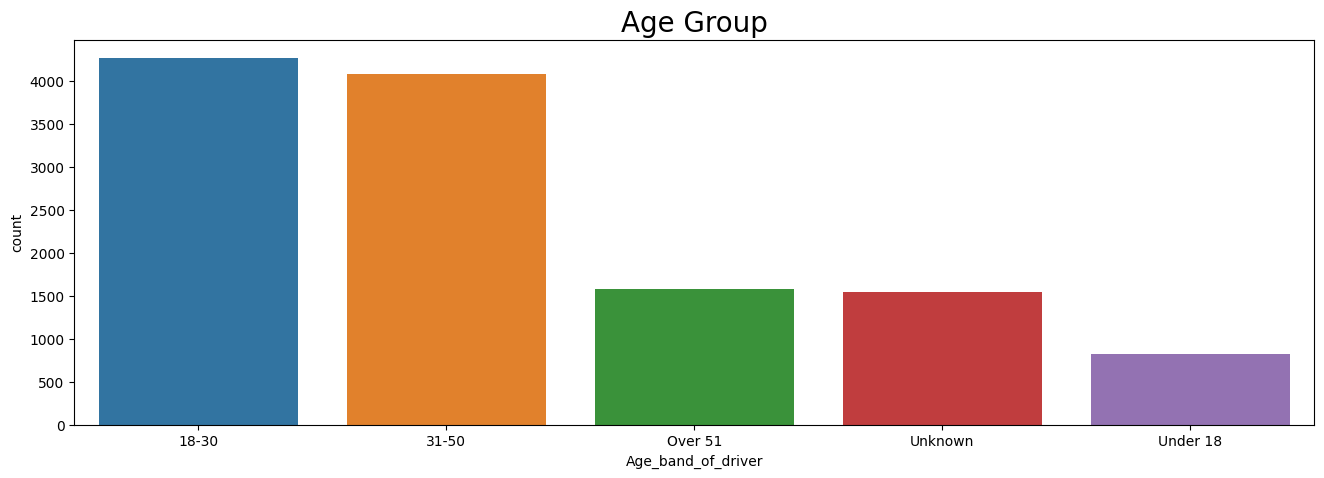

In [74]:
plt.figure(figsize=(16,5))
sns.barplot(data=q,x="Age_band_of_driver",y='count')
plt.title("Age Group",fontsize=20)

In [82]:
u=df2.groupby(["Accident_severity"])['Accident_severity'].agg(['count'])
v=u.sort_values(by='count',ascending=False).reset_index()
v

,Accident_severity,count
0,Slight Injury,10415
1,Serious Injury,1743
2,Fatal injury,158


<Axes: xlabel='Accident_severity', ylabel='count'>

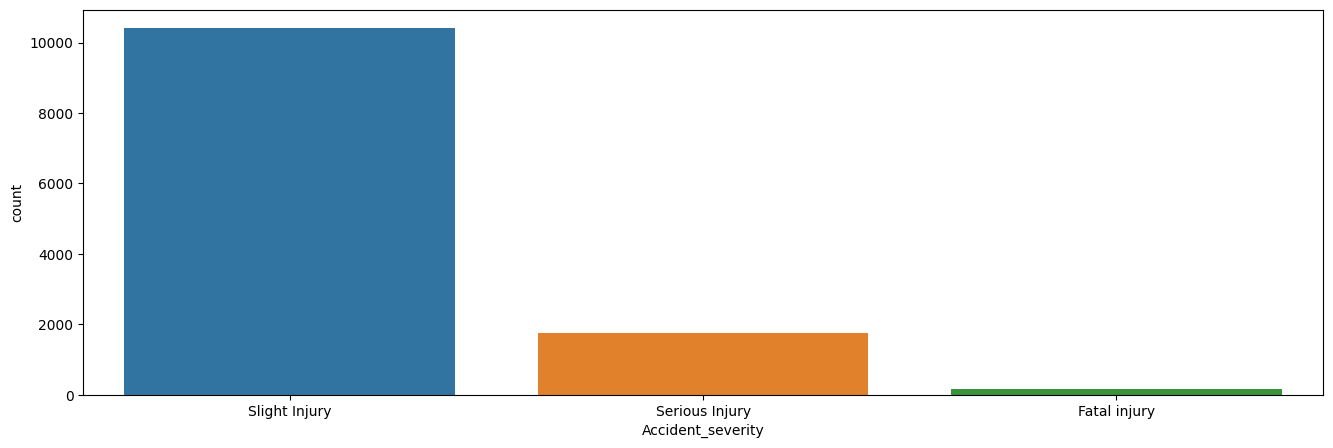

In [84]:
plt.figure(figsize=(16,5))
sns.barplot(data=v,x="Accident_severity",y='count')


In [97]:
m=df2.groupby(["Number_of_casualties"])['Accident_severity'].sum()
m

Number_of_casualties
1    Slight InjurySlight InjurySlight InjurySlight ...
2    Slight InjurySlight InjurySerious InjurySlight...
3    Serious InjurySlight InjurySerious InjurySligh...
4    Slight InjurySlight InjurySlight InjurySlight ...
5    Serious InjurySerious InjurySerious InjurySeri...
6    Slight InjurySlight InjurySlight InjurySlight ...
7    Slight InjurySlight InjurySlight InjurySlight ...
8    Slight InjurySlight InjurySlight InjurySlight ...
Name: Accident_severity, dtype: object

In [107]:
m=df2.groupby(["Number_of_casualties"])['Accident_severity'].sum()


In [105]:
ff = pd.crosstab(index=df2['Light_conditions'], columns=df2['Light_conditions'], margins=True)
pd.crosstab(index=df2['Light_conditions'], columns=df2['Light_conditions'], margins=True)
numOfDayLight = ff.iloc[3, 3]
numOfDayLight
numOfNightLit = ff.iloc[0, 0]
survey_data = pd.crosstab(index=df2['Accident_severity'], columns=df2['Light_conditions'], margins=True)
survey_data
numOfDayLightNS2 = survey_data.iloc[2, 3]
numOfSev2 = survey_data.iloc[2, 4]
numOfDayLightNS2
survey_data.iloc[2, 2]
survey_data

Light_conditions,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight,All
Accident_severity,,,,,
Fatal injury,66,0,5,87,158
Serious Injury,465,7,49,1222,1743
Slight Injury,2755,33,138,7489,10415
All,3286,40,192,8798,12316


In [108]:
A = numOfDayLightNS2 / numOfSev2
A

0.7190590494479117

In [ ]:
#since the mean of severity is higher in the daylight and the probability of severity is fatal happening given the accident
#happened in daylight accidents is very high ,thus the hypothesis is wrong.

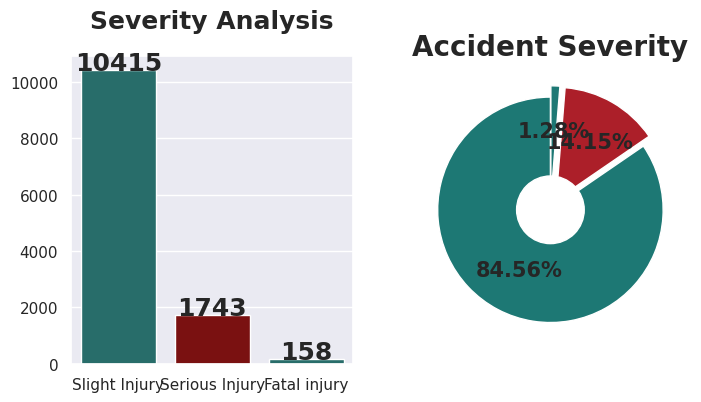

In [109]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
Severity = df2["Accident_severity"].value_counts()
sns.barplot(x=Severity.index,y=Severity.values,palette=["#1d7874","#8B0000"])
plt.title("Severity Analysis",fontweight="black",size=18,pad=20)
for i,j in enumerate(Severity.values):
 plt.text(i,j,j, ha = "center",fontweight="black",fontsize=18)
plt.subplot(1,2,2)
plt.pie(Severity, autopct="%.2f%%", textprops={"fontweight":"black","size":15},
 colors = ["#1d7874","#AC1F29"],explode=[0,0.1,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Accident Severity",fontweight="black",size=20,pad=10)
plt.show()


 Key-Points
EDA Conclusion and Key Points:
Age and Driving Experience:
Young and inexperienced drivers are more prone to accidents compared to older and experienced drivers. Young drivers need
targeted road safety interventions and awareness programs.
Gender:
There might be variations in accident rates between male and female drivers. Understanding gender-specific accident patterns
can lead to gender-specific safety measures.
Vehicle Defects:
Vehicle defects play a role in contributing to accidents. Regular vehicle maintenance and inspections are essential to minimize
accidents caused by defects.
Road Conditions:
Different road surface types and conditions affect accident frequencies. Improving road conditions can have a positive impact on
road safety.
Light and Weather Conditions*:
Poor visibility due to low light or adverse weather conditions increases accident risk. Adequate street lighting and weather alerts
can help prevent accidents in such conditions.
Causes of Accidents:
Identifying common causes of accidents is crucial for preventive strategies. Addressing major accident causes can significantly
reduce accident rate

Recommendations
Recommendations based on Road Traffic Accidents EDA:
Regular Vehicle Maintenance:
1. Encourage vehicle owners to conduct regular maintenance checks and address any defects promptly. Promote awareness
campaigns on the importance of vehicle safety and maintenance. Improved Road Infrastructure:
2. Identify accident-prone roads and junctions, and invest in improving their design and safety features. Ensure proper road
signage, markings, and adequate street lighting to enhance visibility.
Weather and Light Condition Alerts:
3. Implement weather condition alert systems to warn drivers about adverse weather conditions. Install smart lighting systems
to adjust lighting levels based on ambient light conditions.
Safety Inspections for Vehicles and Roads:
4. Introduce mandatory safety inspections for vehicles, especially for older vehicles, to reduce accidents caused by vehicle
defects.
5. Conduct periodic road safety audits to identify potential hazards and road condition issues.
Focused Enforcement of Traffic Laws:
Increase law enforcement presence at accident-prone locations to deter reckless driving and enforce traffic laws. Implement strict
penalties for traffic violations to promote adherence to road safety rules.

Advice:
Having less driving experience will result in more severe accidents. It is recommended to provide more training for
inexperienced drivers. Furthermore, drivers with no license have the most severe accidents.thus, the hypothesis is wron